In [1]:
#### 3.3.Gene_set_enrichment_analysis_reselected.R
### 1.Loading
COAD.tb.h.log10.q.all <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/2.Molecular_dataset/2.Gene_set_analysis/COAD.tb.h.log10.q.all.rds")
COAD.tb.c2.log10.q.all <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/2.Molecular_dataset/2.Gene_set_analysis/COAD.tb.c2.log10.q.all.rds")
COAD.tb.c5.log10.q.all <- readRDS("/data8t_4/JH/MyJobs/COAD_NormalCancer_Project/2.Molecular_dataset/2.Gene_set_analysis/COAD.tb.c5.log10.q.all.rds")
COAD.tb.h.c2.c5.log10.q <- rbind(COAD.tb.h.log10.q.all, COAD.tb.c2.log10.q.all, COAD.tb.c5.log10.q.all)

[1] "HALLMARK_HYPOXIA"                          
[2] "GO_RESPONSE_TO_OXIDATIVE_STRESS"           
[3] "HALLMARK_ANGIOGENESIS"                     
[4] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
[5] "GO_EXTRACELLULAR_MATRIX_DISASSEMBLY"       
[6] "HALLMARK_APOPTOSIS"                        
[7] "KUMAR_AUTOPHAGY_NETWORK"

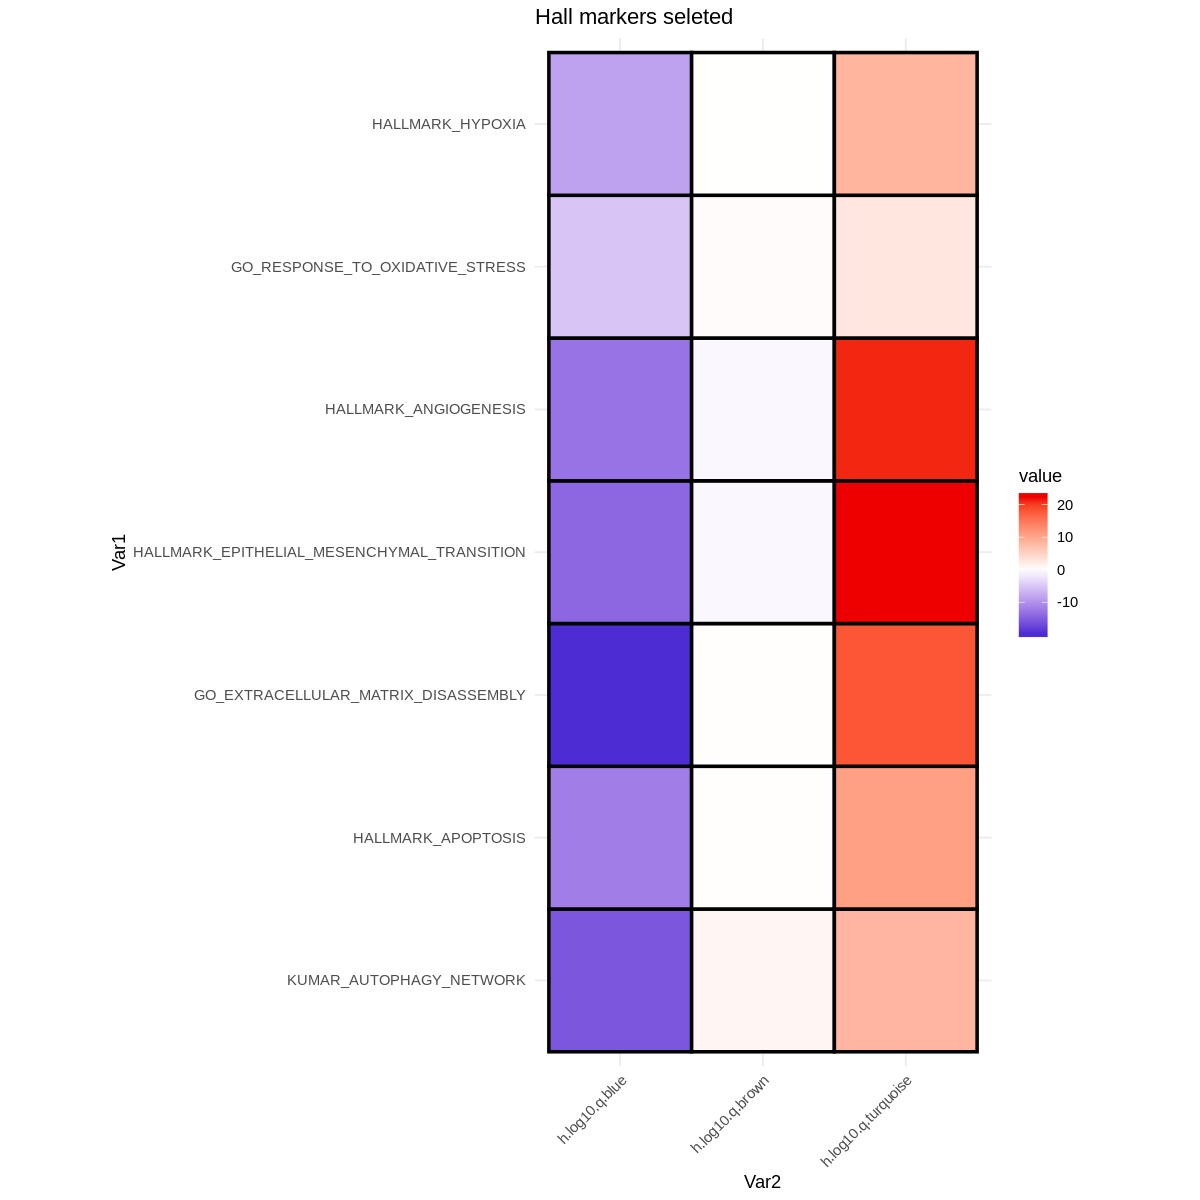

In [43]:
## Signature selection
options(repr.plot.width=10, repr.plot.height=10)
Signature.selected <- c(#"HALLMARK_ALLOGRAFT_REJECTION",
                #"HALLMARK_MYC_TARGETS_V2",
                #"HALLMARK_KRAS_SIGNALING_UP",
                #"HALLMARK_COMPLEMENT",
                "HALLMARK_HYPOXIA",
                "GO_RESPONSE_TO_OXIDATIVE_STRESS",
                "HALLMARK_ANGIOGENESIS",
                "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION",
                #"ALONSO_METASTASIS_EMT_UP",
                "GO_EXTRACELLULAR_MATRIX_DISASSEMBLY",
                "HALLMARK_APOPTOSIS",
                "KUMAR_AUTOPHAGY_NETWORK"
                #"SOUCEK_MYC_TARGETS"
                )
Signature.selected
library(reshape2)
library(ggplot2)
log10.q.Signature.selected <- COAD.tb.h.c2.c5.log10.q[rev(Signature.selected),1:3]
log10.q.Signature.selected.m <- melt(log10.q.Signature.selected)
ggplot(log10.q.Signature.selected.m, aes(Var2, Var1)) +
  geom_tile(aes(fill = value),colour = "black",lwd = 1) + theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = "Hall markers seleted")+
  scale_fill_gradient2(low = "mediumblue", high = "red2", mid = "white",midpoint = 0) + coord_fixed()

write.csv(log10.q.Signature.selected, file = "log10.q.Signature.selected.csv")

[1] "PID_HIF1_TFPATHWAY"              "PID_PI3KCI_PATHWAY"             
[3] "HALLMARK_KRAS_SIGNALING_UP"      "KEGG_MAPK_SIGNALING_PATHWAY"    
[5] "KEGG_VEGF_SIGNALING_PATHWAY"     "KEGG_TGF_BETA_SIGNALING_PATHWAY"
[7] "BIOCARTA_AKT_PATHWAY"            "KEGG_MTOR_SIGNALING_PATHWAY"

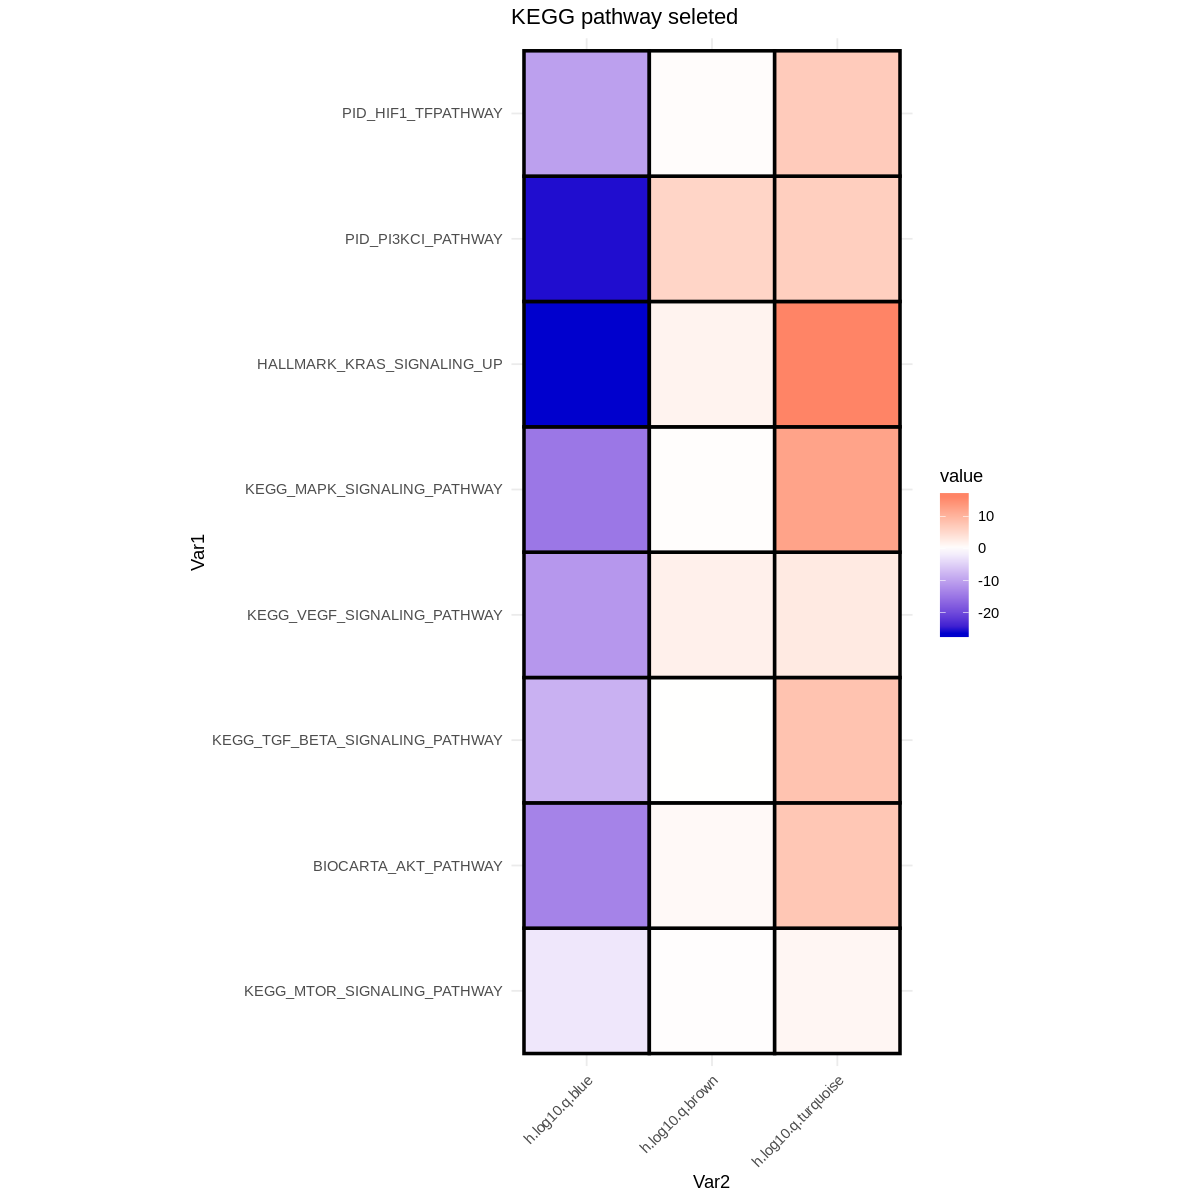

In [42]:
## PATHWAY selection
PATHWAY.selected <- c(#"KEGG_JAK_STAT_SIGNALING_PATHWAY",
                        "PID_HIF1_TFPATHWAY",
                        "PID_PI3KCI_PATHWAY",
                          "HALLMARK_KRAS_SIGNALING_UP",
                           "KEGG_MAPK_SIGNALING_PATHWAY",
                           #"KEGG_CALCIUM_SIGNALING_PATHWAY",
                           "KEGG_VEGF_SIGNALING_PATHWAY",
                           "KEGG_TGF_BETA_SIGNALING_PATHWAY",
                           #"KEGG_HEDGEHOG_SIGNALING_PATHWAY",
                           "BIOCARTA_AKT_PATHWAY",
                           "KEGG_MTOR_SIGNALING_PATHWAY"
                           #"KEGG_WNT_SIGNALING_PATHWAY",
                           #"KEGG_NOTCH_SIGNALING_PATHWAY",
                           #"KEGG_P53_SIGNALING_PATHWAY",

                           #"REACTOME_MTOR_SIGNALLING",
                           
)
PATHWAY.selected
log10.q.PATHWAY.selected<- COAD.tb.h.c2.c5.log10.q[rev(PATHWAY.selected),1:3]
log10.q.PATHWAY.selected.m <- melt(log10.q.PATHWAY.selected)
ggplot(log10.q.PATHWAY.selected.m, aes(Var2, Var1)) +
  geom_tile(aes(fill = value),colour = "black", lwd = 1) + theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +labs(title = "KEGG pathway seleted")+
  scale_fill_gradient2(low = "mediumblue", high = "red2", mid = "white",midpoint = 0) + coord_fixed()
write.csv(log10.q.PATHWAY.selected,file = "log10.q.PATHWAY.selected.csv")

[1] "KEGG_OXIDATIVE_PHOSPHORYLATION"                        
[2] "GO_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT"           
[3] "REACTOME_BETA_OXIDATION_OF_VERY_LONG_CHAIN_FATTY_ACIDS"
[4] "KEGG_GLUTATHIONE_METABOLISM"                           
[5] "KEGG_GLYCEROPHOSPHOLIPID_METABOLISM"                   
[6] "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS"         
[7] "KEGG_PENTOSE_PHOSPHATE_PATHWAY"                        
[8] "KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES"

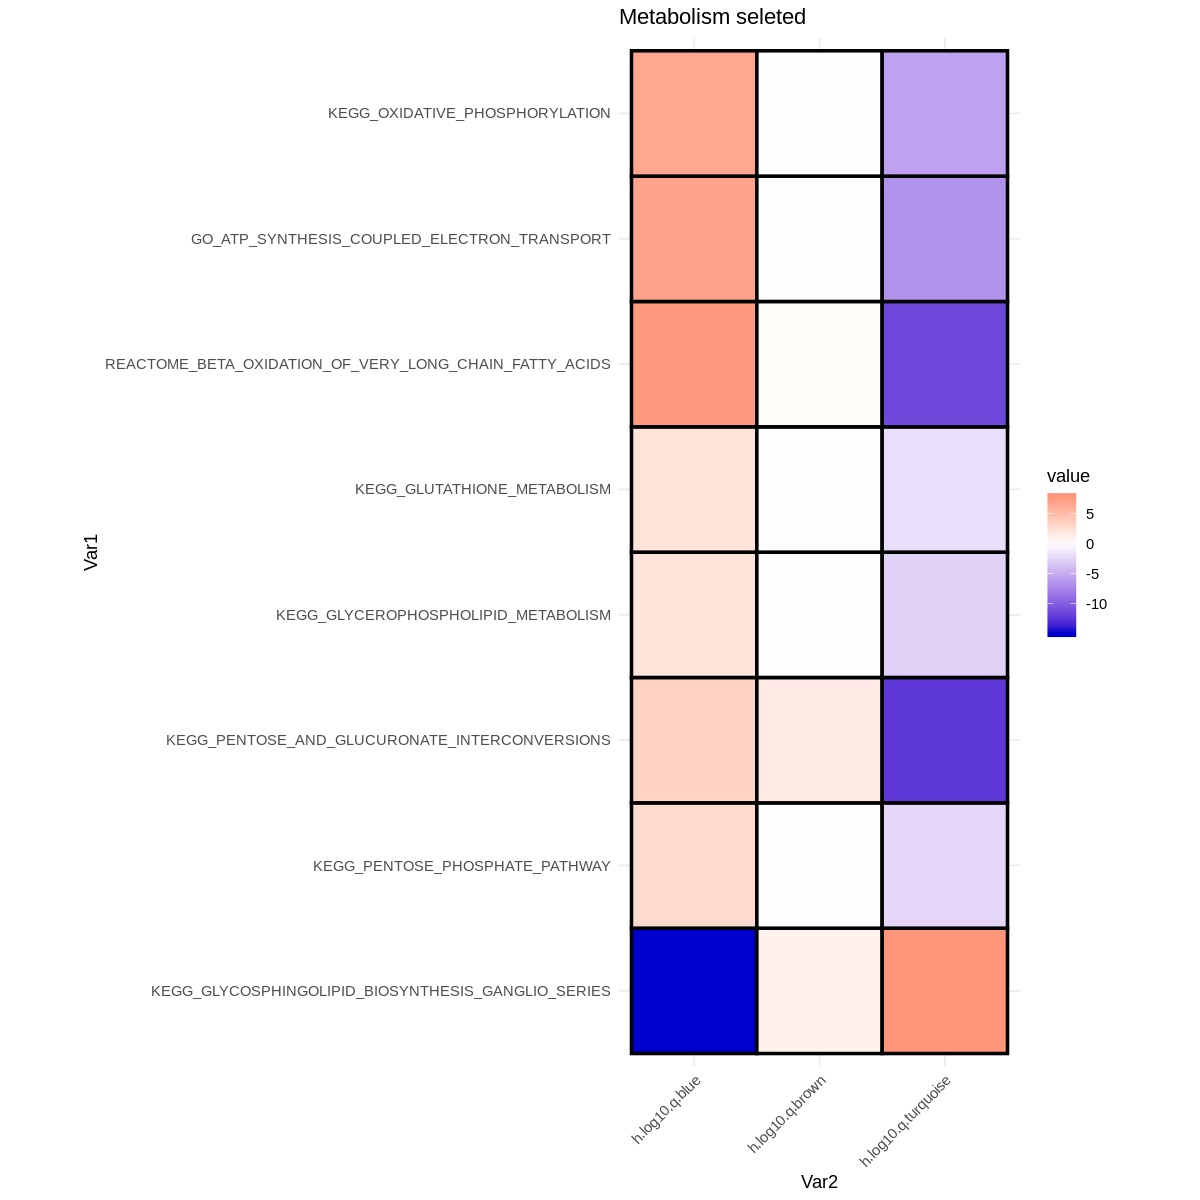

In [44]:
## Metabolism selection
METABOLISM.selected <- c(#"KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM",
                              #"KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM",
                              "KEGG_OXIDATIVE_PHOSPHORYLATION",
                              "GO_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT",
                              "REACTOME_BETA_OXIDATION_OF_VERY_LONG_CHAIN_FATTY_ACIDS",
                              #"KEGG_STARCH_AND_SUCROSE_METABOLISM",
                              #"KEGG_GALACTOSE_METABOLISM",
                              "KEGG_GLUTATHIONE_METABOLISM",
                              #"KEGG_NITROGEN_METABOLISM",
                              #"KEGG_TYROSINE_METABOLISM",
                              "KEGG_GLYCEROPHOSPHOLIPID_METABOLISM",
                              #"KEGG_FATTY_ACID_METABOLISM",
                              #"KEGG_LINOLEIC_ACID_METABOLISM",
                              "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS",
                              "KEGG_PENTOSE_PHOSPHATE_PATHWAY",
                              "KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES"


                              #"REACTOME_FATTY_ACIDS",
                              #"GO_FATTY_ACID_BETA_OXIDATION_USING_ACYL_COA_OXIDASE"
                              #"KEGG_PYRUVATE_METABOLISM"
)
METABOLISM.selected
log10.q.METABOLISM.selected <- COAD.tb.h.c2.c5.log10.q[rev(METABOLISM.selected),1:3]
log10.q.METABOLISM.selected.m <- melt(log10.q.METABOLISM.selected)
ggplot(log10.q.METABOLISM.selected.m, aes(Var2, Var1)) +
  geom_tile(aes(fill = value),colour = "black", lwd = 1) + theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = "Metabolism seleted")+
  scale_fill_gradient2(low = "mediumblue", high = "red2", mid = "white",midpoint = 0) + coord_fixed()

write.csv(log10.q.METABOLISM.selected, file = "log10.q.METABOLISM.selected.csv")

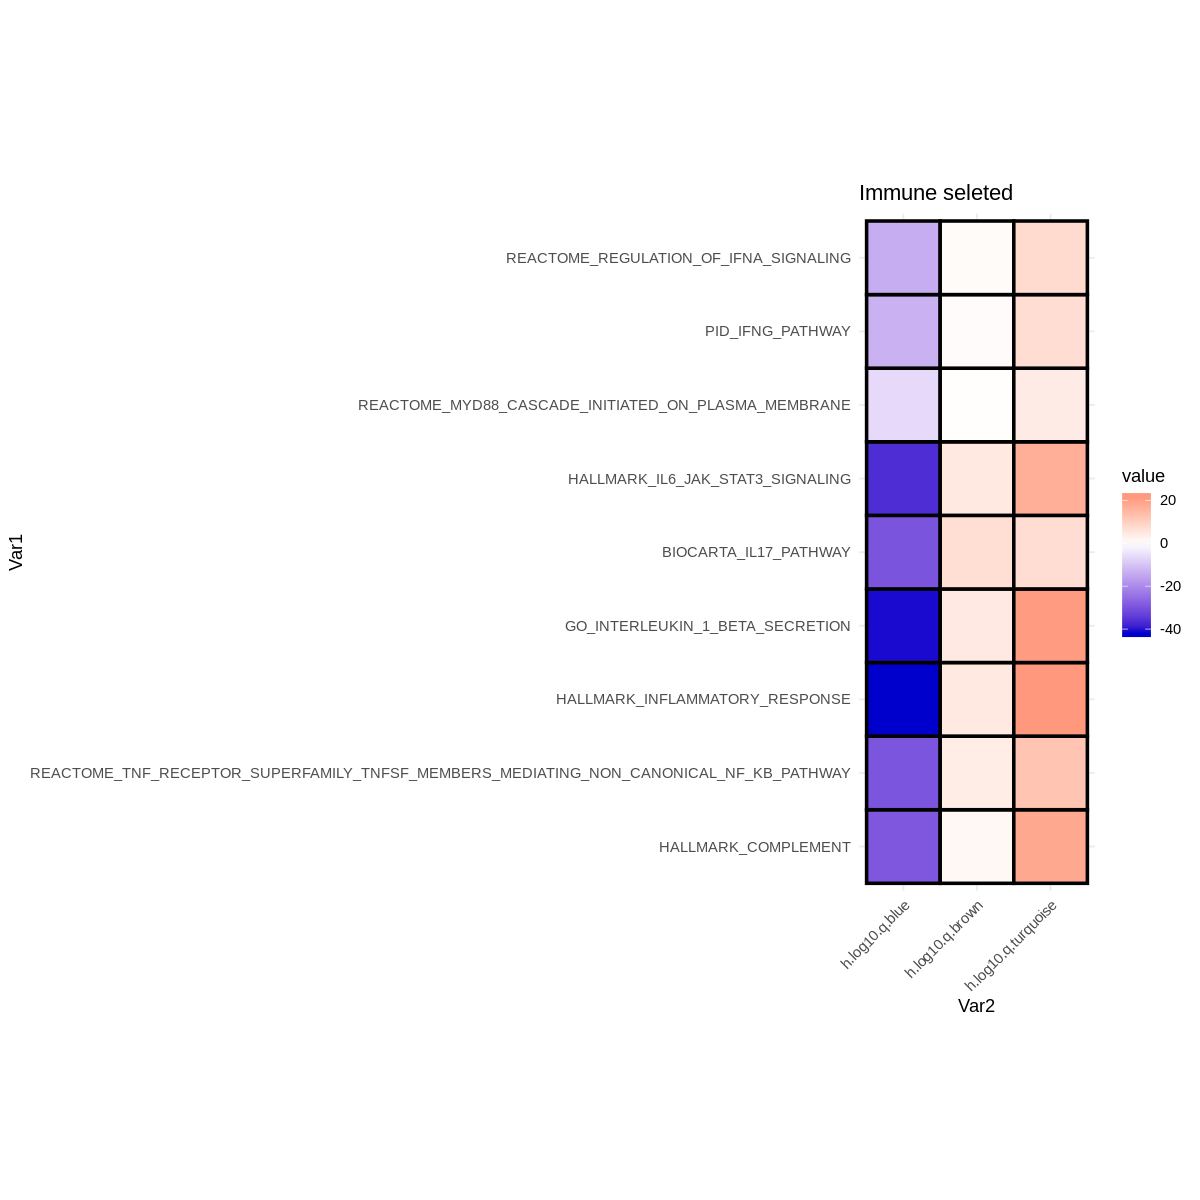

In [45]:
#### Immune selection
IMMUNE.selected <- c("REACTOME_REGULATION_OF_IFNA_SIGNALING",
                         "PID_IFNG_PATHWAY",
                         "REACTOME_MYD88_CASCADE_INITIATED_ON_PLASMA_MEMBRANE",
                         "HALLMARK_IL6_JAK_STAT3_SIGNALING",
                         "BIOCARTA_IL17_PATHWAY",
                         "GO_INTERLEUKIN_1_BETA_SECRETION",
                         "HALLMARK_INFLAMMATORY_RESPONSE",
                         "REACTOME_TNF_RECEPTOR_SUPERFAMILY_TNFSF_MEMBERS_MEDIATING_NON_CANONICAL_NF_KB_PATHWAY",
                         "HALLMARK_COMPLEMENT"
                         )
log10.q.IMMUNE.selected <- COAD.tb.h.c2.c5.log10.q[rev(IMMUNE.selected),1:3]
log10.q.IMMUNE.selected.m <- melt(log10.q.IMMUNE.selected)
ggplot(log10.q.IMMUNE.selected.m, aes(Var2, Var1)) +
  geom_tile(aes(fill = value),colour = "black",lwd =1) + theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = "Immune seleted")+
  scale_fill_gradient2(low = "mediumblue", high = "red2", mid = "white",midpoint = 0) + coord_fixed()

write.csv(log10.q.IMMUNE.selected, file = "log10.q.IMMUNE.selected.csv")